# STA 141B: Homework 4
Winter 2018

## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

__Action to Exercise 1.1__

#### Load library

In [253]:
import numpy as np
import pandas as pd

####  Making HTTP Requests With Python using "requests" library 
* useful reading: https://realpython.com/python-requests/
* Backgroud information of HTTP Request Methods: https://www.w3schools.com/tags/ref_httpmethods.asp

In [254]:
import requests

In [255]:
# For example:

# I registered to get a key to access  USDA Food Composition Databases
API_Key = "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc"

# "get" method to get your request results
# Save it as "response"
response= requests.get( "https://api.nal.usda.gov/ndb/search", 
             params = {"api_key":"mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc"} )


"status_code" == 200 indicate that the request is successful.

In [256]:
response.status_code

200

#### See the resuqest content in a dictionary format using '.json()' method.

In [257]:
response.json()

{'list': {'ds': 'any',
  'end': 150,
  'group': '',
  'item': [{'ds': 'LI',
    'group': 'Branded Food Products Database',
    'manu': 'none',
    'name': 'SLICED POTATOES, UPC: 070038630678',
    'ndbno': '45346780',
    'offset': 0},
   {'ds': 'LI',
    'group': 'Branded Food Products Database',
    'manu': 'none',
    'name': 'WHOLE SWEET, UPC: 070038331858',
    'ndbno': '45346779',
    'offset': 1},
   {'ds': 'LI',
    'group': 'Branded Food Products Database',
    'manu': 'none',
    'name': 'TROPICAL BLEND, UPC: 070038647713',
    'ndbno': '45346778',
    'offset': 2},
   {'ds': 'LI',
    'group': 'Branded Food Products Database',
    'manu': 'none',
    'name': 'DIP MIX, UPC: 070038629092',
    'ndbno': '45346777',
    'offset': 3},
   {'ds': 'LI',
    'group': 'Branded Food Products Database',
    'manu': 'none',
    'name': 'DRINK MIX, UPC: 070038594482',
    'ndbno': '45346776',
    'offset': 4},
   {'ds': 'LI',
    'group': 'Branded Food Products Database',
    'manu': 'non

####  Set up a cache for requests

In [258]:
import requests_cache
requests_cache.install_cache('demo_cache')

urlparse   
* defines a standard interface to break Uniform Resource Locator (URL) strings up in components (addressing scheme, network location, path etc.)
* reference: https://docs.python.org/2/library/urlparse.html

In [259]:
from urllib.parse import urlparse

# For example
o = urlparse('https://docs.python.org/2/library/urlparse.html')

In [260]:
o

ParseResult(scheme='https', netloc='docs.python.org', path='/2/library/urlparse.html', params='', query='', fragment='')

In [261]:
o.scheme

'https'

In [262]:
o.port

In [263]:
o.geturl()

'https://docs.python.org/2/library/urlparse.html'

In [264]:
list(o)

['https', 'docs.python.org', '/2/library/urlparse.html', '', '', '']

#### Understand how to use "NDB API" web API that returns data in JSON format

* https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md

| Name    | Required | Default | Description                                                                   |
|---------|----------|---------|-------------------------------------------------------------------------------|
| api_key | y        | n/a     | Must be a data.gov registered API key                                         |
| q       | n        | ""      | Search terms                                                                  |
| ds      | n        | ""      | Data source. Must be either 'Branded Food   Products' or 'Standard Reference' |
| fg      | n        | ""      | Food group ID                                                                 |
| sort    | n        | r       | Sort the results by food name (n) or by   search relevance (r)                |
| max     | n        | 50      | maximum rows to return                                                        |
| offset  | n        | 0       | beginning row in the result set to begin                                      |
| format1 | n        | JSON    | results format: json or xml                                                   |

#### Let's do a serach for "quail eggs"

In [265]:
API_Key = "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc"
term = "quail eggs"

response = requests.get(
    url = "https://api.nal.usda.gov/ndb/search", 
    params = {
        "api_key": API_Key,
        "q": term,
        "format": "json"})

response

<Response [200]>

#### Let take a look at the  content 
1. The requested info is in the keyword "list" item
2. Then within the list, all hte requested info is in keyword "item" 


In [266]:
response.json()

{'list': {'ds': 'any',
  'end': 6,
  'group': '',
  'item': [{'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
    'ndbno': '45169279',
    'offset': 0},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
    'ndbno': '45178254',
    'offset': 1},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
    'ndbno': '45094707',
    'offset': 2},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
    'ndbno': '45094890',
    'offset': 3},
   {'ds': 'BL',
    'group': 'Branded Food Products Database',
    'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
    'ndbno': '45099560',
    'offset': 4},
   {'ds': 'SR',
    'group': 'Dairy and Egg Products',
    'name': 'Egg, quail, whole, fresh, raw',
    'ndbno': '01140',
 

#### Action: We can use dictionary method to extract these requested information
* Great, this is what we want for the output uisng term "quail eggs"

In [268]:
response.json()['list']['item']

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

__Function construnction for Exercise 1.1__

In [269]:
def ndb_search(term):
    '''
    Action: A function called ndb_search() that makes a search request based on the term (user input)
    Arguemnt: this function accept the search term as an argument
    Return: it returns the search result items as a list (for 0 items, return an empty list)
    '''
    # Set up my key to access the database
    API_Key = "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc"

    if term == 0 :
        response = []
        print("No request is provided")
        return response
    
    elif term == None:
        response = []
        print("No request is provided")
        return response
    
    else:
        response = requests.get( 
            "https://api.nal.usda.gov/ndb/search", 
            params = {
                "api_key": API_Key,
                "q": term,
                "format": "json"})
        return response.json()['list']['item']

In [270]:
# Fuction test: it's correct 
ndb_search("quail eggs")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

In [271]:
# test if 0 items, the function returns an empty list
search_test1 = ndb_search(0)
search_test1

No request is provided


[]

In [272]:
# test if items is empty, the function returns an empty list
search_test2 = ndb_search(None)
search_test2

No request is provided


[]

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

#### Check the data frame content of search result

In [273]:
# Read fresh.csv file
dframe = pd.read_csv('fresh.csv')
selection = list(range(0,5)) + list(range(40,49))
dframe.iloc[selection, :]

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit
40,Fresh1,1.311629,0.900000,0.275578,0.401618,radish,vegetables
41,Fresh1,1.244737,0.714000,0.451948,0.787893,butternut_squash,vegetables
42,Fresh1,2.235874,0.740753,0.319670,0.964886,avocados,vegetables
43,Fresh1,2.807302,1.050000,0.286601,0.766262,kale,vegetables
44,Fresh1,2.213050,0.375309,0.385809,2.274967,artichoke,vegetables


In [274]:
# Check the request results in dataframe
df = pd.DataFrame(ndb_search("quail eggs"))
df

,ds,group,name,ndbno,offset
0,BL,Branded Food Products Database,"GRAN SABANA, QUAIL EGGS, UPC: 819140010103",45169279,0
1,BL,Branded Food Products Database,"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",45178254,1
2,BL,Branded Food Products Database,"CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186",45094707,2
3,BL,Branded Food Products Database,"L&W, QUAIL EGGS, UPC: 024072000256",45094890,3
4,BL,Branded Food Products Database,"BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098",45099560,4
5,SR,Dairy and Egg Products,"Egg, quail, whole, fresh, raw",01140,5


#### Planned actions : 
1. My strategy is to extract the "food" column from fresh.csv file. 
2. Create a for loop based to iterate through the food column and each food name is the input for ndb_search() function.
3. ndb_search() will serach the ndb number through search url https://api.nal.usda.gov/ndb/search. 
4. To avoid the unacceptable string structure (ex " _ " in the food name), I use str.replace() to replace " - " with emptyspace.
5. To select the food which are raw and unbranded, I use string method to select "SR" from the ds column and then select raw in the "name column". 
6. I need a empty data frame with six columns to stored the searched information.

#### Execution for Exercise 1.2:

In [275]:
# Read the food name in the csv file
path= ("C:/Users/WeiKuang/Documents/GitHub/141b-hw4-Wei-Kuang/fresh.csv")
fresh_df = pd.read_csv(path)

# Extract the "food column" from fresh.csv. It will be used for "for loop"
food_list= list(fresh_df['food'])

#### for loop

In [276]:
# Creat an empty dataframe for "for loop"
DF = pd.DataFrame(pd.np.empty((0, 6))) # create a empty dataframe with 6 cols
DF.columns = ['food','ds','group','name', 'ndbno','offset']
DF

for FoodName in food_list:
    FoodName_i = FoodName.replace("_", " ")  
    Out = ndb_search(FoodName_i)
    
    # convert into dataframe
    Out = pd.DataFrame(Out)
    
    # Select the row where "SR" is in the ds columns
    is_SR = Out['ds'].str.contains("SR").fillna(False)
    Out = Out.loc[is_SR,:]
    
    # Select raw in name column
    is_RAW = Out['name'].str.contains(", raw").fillna(False)
    Out = Out.loc[is_RAW,:]
    
    #insert the food name in "food column"
    Out.insert(0,'food',FoodName)
    
    # Append the data
    DF = DF.append(Out)

DF.head()

,food,ds,group,name,ndbno,offset
4,watermelon,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,4.0
0,cantaloupe,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0.0
7,tangerines,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,7.0
8,tangerines,SR,Fruits and Fruit Juices,"Tangerine juice, raw",09221,8.0
89,strawberries,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,89.0


#### Remove the duplication of the food
Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html

In [277]:
DF_cleaned= DF.copy()
# Remove the duplicated food
DF_cleaned = DF_cleaned.drop_duplicates(subset='food', keep='first')   # subset is the column name
# Remove the unwanted columns
DF_cleaned = DF_cleaned.drop(['group', 'name', 'offset'], axis=1)      # axis=1 (coulumn-wise)
DF_cleaned = DF_cleaned.reset_index(drop = True)                       # Drop the original row index
DF_cleaned

,food,ds,ndbno
0,watermelon,SR,09326
1,cantaloupe,SR,09181
2,tangerines,SR,09218
3,strawberries,SR,09316
4,plums,SR,09279
5,oranges,SR,09201
6,raspberries,SR,09302
7,pomegranate,SR,09286
8,pineapple,SR,09266
9,apricots,SR,09021


#### Merge the ndb number into the food csv file
* The goal is to have ndb number and price information for a food
reading: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [278]:
DF_Merge = fresh_df.merge(DF_cleaned,
                          left_on='food', 
                          right_on='food', 
                          how='inner')
DF_Merge

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ds,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,SR,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,SR,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,SR,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,SR,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,SR,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,SR,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,SR,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,SR,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,SR,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,SR,09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

| Parameter | Required | Default   | Description                                 |
|-----------|----------|-----------|---------------------------------------------|
| api_key   | y        | n/a       | Must be a   data.gov registered API key     |
| ndbno     | y        | n/a       | A list of   up to 25 NDB numbers            |
| type      | n        | b (basic) | Report   type: [b]asic or [f]ull or [s]tats |
| format1   | n        | JSON      | Report   format: xml or json                |

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

#### My action to Exercise 1.3

In [279]:
# Analyze the structure using ".keys()" method for dictionary
NDB ='09279'
response = requests.get( "https://api.nal.usda.gov/ndb/V2/reports", 
                                params = {
                                    "api_key": "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc",
                                    "ndbno": NDB,
                                    "type": "b",
                                    "format": "json"})

In [281]:
output= response.json()
print( type(  output          ) )
print(  len(  output          ) ) 
print(        output.keys()     )

<class 'dict'>
4
dict_keys(['foods', 'count', 'notfound', 'api'])


In [201]:
print( type(  output['foods']  ) )
print( len(   output['foods']  ) ) 

<class 'list'>
1


In [282]:
print( type( output['foods'][0]           ) )
print( len(  output['foods'][0]           ) )
print(       output['foods'][0].keys()      )

<class 'dict'>
1
dict_keys(['food'])


In [283]:
print( type( output['foods'][0]['food']           ) )
print( len(  output['foods'][0]['food']           ) )
print(       output['foods'][0]['food'].keys()      )

<class 'dict'>
5
dict_keys(['sr', 'type', 'desc', 'nutrients', 'footnotes'])


In [207]:
print( type(  output['foods'][0]['food']['nutrients']    ) )
print(  len(  output['foods'][0]['food']['nutrients']    ) )
print(        output['foods'][0]['food']['nutrients']      )

<class 'list'>
33
[{'nutrient_id': '255', 'name': 'Water', 'derivation': 'NONE', 'group': 'Proximates', 'unit': 'g', 'value': '87.23', 'measures': [{'label': 'cup, sliced', 'eqv': 165.0, 'eunit': 'g', 'qty': 1.0, 'value': '143.93'}, {'label': 'fruit (2-1/8" dia)', 'eqv': 66.0, 'eunit': 'g', 'qty': 1.0, 'value': '57.57'}, {'label': 'NLEA serving', 'eqv': 151.0, 'eunit': 'g', 'qty': 1.0, 'value': '131.72'}]}, {'nutrient_id': '208', 'name': 'Energy', 'derivation': 'NC', 'group': 'Proximates', 'unit': 'kcal', 'value': '46', 'measures': [{'label': 'cup, sliced', 'eqv': 165.0, 'eunit': 'g', 'qty': 1.0, 'value': '76'}, {'label': 'fruit (2-1/8" dia)', 'eqv': 66.0, 'eunit': 'g', 'qty': 1.0, 'value': '30'}, {'label': 'NLEA serving', 'eqv': 151.0, 'eunit': 'g', 'qty': 1.0, 'value': '69'}]}, {'nutrient_id': '203', 'name': 'Protein', 'derivation': 'NONE', 'group': 'Proximates', 'unit': 'g', 'value': '0.70', 'measures': [{'label': 'cup, sliced', 'eqv': 165.0, 'eunit': 'g', 'qty': 1.0, 'value': '1.15

__My Note: __
1. There are 33 items in the 'nutrients' list
2. Let's convert it into a dataframe to have a better ideas about the output! 
3. Now, I know that output['foods'][0]['food']['nutrients'] provides all kinds of nutrients information.
4. Then, I can select certains rwos to report ( i.g., Energy, Protein, Fiber, etc. ).

In [285]:
df = pd.DataFrame( output['foods'][0]['food']['nutrients'] )
df 

,derivation,group,measures,name,nutrient_id,unit,value
0,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Water,255,g,87.23
1,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Energy,208,kcal,46
2,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Protein,203,g,0.70
3,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Total lipid (fat),204,g,0.28
4,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Carbohydrate, by difference",205,g,11.42
5,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Fiber, total dietary",291,g,1.4
6,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Sugars, total",269,g,9.92
7,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Calcium, Ca",301,mg,6
8,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Iron, Fe",303,mg,0.17
9,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Magnesium, Mg",304,mg,7


#### Set up the rows that I am interested in.

In [238]:
My_interest = ['Energy', 
               'Fiber, total dietary', 
               'Calcium, Ca', 
               'Iron, Fe', 
               'Magnesium, Mg', 
               'Vitamin C, total ascorbic acid',
               'Vitamin B-6',
               'Vitamin B-12',
               'Vitamin E (alpha-tocopherol)']


logic_selection= [x in My_interest for x in df['name'] ]
df.loc[logic_selection]

,derivation,group,measures,name,nutrient_id,unit,value
1,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Energy,208,kcal,46
5,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Fiber, total dietary",291,g,1.4
7,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Calcium, Ca",301,mg,6
8,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Iron, Fe",303,mg,0.17
9,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Magnesium, Mg",304,mg,7
14,NONE,Vitamins,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Vitamin C, total ascorbic acid",401,mg,9.5
18,NONE,Vitamins,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Vitamin B-6,415,mg,0.029
20,NONE,Vitamins,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Vitamin B-12,418,µg,0.00
23,NONE,Vitamins,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Vitamin E (alpha-tocopherol),323,mg,0.26


#### Write a function "food_report" to extract the food nutrition

In [286]:
def food_report(NDB):
    '''
    Action: A function that makes a search request based on the NDB number
    Arguemnt: this function accept "NDB" number as an argument
    Return: it returns the list of nutrients for the food.
    '''
    if NDB == 0 :
        response = []
        return response
    
    elif NDB == None:
        response = []
        return response
    
    else:
        response = requests.get( "https://api.nal.usda.gov/ndb/V2/reports", 
                                params = {
                                    "api_key": "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc",
                                    "ndbno": NDB,
                                    "type": "b",
                                    "format": "json"})
        
        return response.json()['foods'][0]['food']['nutrients']

# Note: use type() to test whether the returned object is a dict or list

In [287]:
# Test: the first element of the returned list, with NDB = "09279" (raw plums) 
food_report("09279")[0]

{'derivation': 'NONE',
 'group': 'Proximates',
 'measures': [{'eqv': 165.0,
   'eunit': 'g',
   'label': 'cup, sliced',
   'qty': 1.0,
   'value': '143.93'},
  {'eqv': 66.0,
   'eunit': 'g',
   'label': 'fruit (2-1/8" dia)',
   'qty': 1.0,
   'value': '57.57'},
  {'eqv': 151.0,
   'eunit': 'g',
   'label': 'NLEA serving',
   'qty': 1.0,
   'value': '131.72'}],
 'name': 'Water',
 'nutrient_id': '255',
 'unit': 'g',
 'value': '87.23'}

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

#### Step 1: Form a temporary dataframe that has ndb number and nutrients of my interest

In [300]:
My_interest = ['Energy', 
               'Fiber, total dietary', 
               'Calcium, Ca', 
               'Iron, Fe', 
               'Magnesium, Mg', 
               'Vitamin C, total ascorbic acid',
               'Vitamin B-6',
               'Vitamin B-12',
               'Vitamin E (alpha-tocopherol)']

In [301]:
# Creat an empty dataframe for "for loop"
DF_ndb_nutri = pd.DataFrame(pd.np.empty((0, 10))) # create a empty dataframe with 5 cols
DF_ndb_nutri.columns = ['ndbno'] + My_interest 
DF_ndb_nutri

,ndbno,Energy,"Fiber, total dietary","Calcium, Ca","Iron, Fe","Magnesium, Mg","Vitamin C, total ascorbic acid",Vitamin B-6,Vitamin B-12,Vitamin E (alpha-tocopherol)


#### Step 2: Execution:

In [302]:
for NDB in DF_Merge['ndbno']:
    
    # convert the list to dataframe
    df1 = pd.DataFrame( food_report( NDB ) )
    
    # If the list of nutrient is not complete, then skip this one and move to the next food 
    if len(df1.iloc[:,0]) !=33:
        next
    
    else:
        # Drop the uesless columns
        df1 = df1.drop(['group','derivation', 'measures'], axis=1)
        
        # Select nutrients of my interest
        logic_selection= [x in My_interest for x in df['name'] ]
        df1= df1.loc[logic_selection]
        
        # transpose
        df1_T = df1.transpose()
        # n_df_s_T.columns = [list(n_df_s_T.iloc[0])] # rename the col
        df1_T.columns = My_interest
        
        # select the row of value
        df1_T = df1_T.iloc[[3]]
        
        # Add the ndb number
        df1_T.insert(0,"ndbno", NDB)
        
        # Append
        DF_ndb_nutri = DF_ndb_nutri.append(df1_T)

In [303]:
# Modify column names
DF_ndb_nutri.columns =  [
               'ndbno',
               'Energy', 
               'Fiber', 
               'Calcium', 
               'Iron', 
               'Magnesium', 
               'Vitamin C',
               'Vitamin B-6',
               'Vitamin B-12',
               'Vitamin E']

DF_ndb_nutri.head()

,ndbno,Energy,Fiber,Calcium,Iron,Magnesium,Vitamin C,Vitamin B-6,Vitamin B-12,Vitamin E
value,09326,30,0.4,7,0.24,10,8.1,0.045,0.00,0.05
value,09181,34,0.9,9,0.21,12,36.7,0.072,0.00,0.05
value,09218,53,1.8,37,0.15,12,26.7,0.078,0.00,0.20
value,09316,32,2.0,16,0.41,13,58.8,0.047,0.00,0.29
value,09279,46,1.4,6,0.17,7,9.5,0.029,0.00,0.26


In [304]:
# Merge 
DF_final = DF_Merge.merge(DF_ndb_nutri, left_on='ndbno', right_on='ndbno', how='inner')
DF_final.head(3)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ds,ndbno,Energy,Fiber,Calcium,Iron,Magnesium,Vitamin C,Vitamin B-6,Vitamin B-12,Vitamin E
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,SR,09326,30,0.4,7,0.24,10,8.1,0.045,0.00,0.05
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,SR,09181,34,0.9,9,0.21,12,36.7,0.072,0.00,0.05
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,SR,09218,53,1.8,37,0.15,12,26.7,0.078,0.00,0.20


In [305]:
# Drop columns that are not used for the analysis
DF_final= DF_final.drop(['form','lb_per_cup', 'price_per_cup', 'type', 'ds'], axis=1)
DF_final.head()

,price_per_lb,yield,food,ndbno,Energy,Fiber,Calcium,Iron,Magnesium,Vitamin C,Vitamin B-6,Vitamin B-12,Vitamin E
0,0.333412,0.52,watermelon,09326,30,0.4,7,0.24,10,8.1,0.045,0.00,0.05
1,0.535874,0.51,cantaloupe,09181,34,0.9,9,0.21,12,36.7,0.072,0.00,0.05
2,1.377962,0.74,tangerines,09218,53,1.8,37,0.15,12,26.7,0.078,0.00,0.20
3,2.358808,0.94,strawberries,09316,32,2.0,16,0.41,13,58.8,0.047,0.00,0.29
4,1.827416,0.94,plums,09279,46,1.4,6,0.17,7,9.5,0.029,0.00,0.26


#### Step 3: Analysis
The best value is what we could spend the one dollar to gain the most weight from the edible part of food. I create a colunm called "edible_pound per_1_dollar" to reflect this idea. The formula of "edible_pound_per_1_dollar" is [ yield /  price per pound ], and the larger value, the better. 




In [306]:
edible_pound_per_1_dollar = DF_final['yield'] / DF_final['price_per_lb'] 

In [307]:
DF_final.insert(2, "edible_pount_per_1_dollar",edible_pound_per_1_dollar)

In [308]:
DF_final.head()

,price_per_lb,yield,edible_pount_per_1_dollar,food,ndbno,Energy,Fiber,Calcium,Iron,Magnesium,Vitamin C,Vitamin B-6,Vitamin B-12,Vitamin E
0,0.333412,0.52,1.559632,watermelon,09326,30,0.4,7,0.24,10,8.1,0.045,0.00,0.05
1,0.535874,0.51,0.951717,cantaloupe,09181,34,0.9,9,0.21,12,36.7,0.072,0.00,0.05
2,1.377962,0.74,0.537025,tangerines,09218,53,1.8,37,0.15,12,26.7,0.078,0.00,0.20
3,2.358808,0.94,0.398506,strawberries,09316,32,2.0,16,0.41,13,58.8,0.047,0.00,0.29
4,1.827416,0.94,0.514388,plums,09279,46,1.4,6,0.17,7,9.5,0.029,0.00,0.26


In [312]:
# Calculate the rank by each columns
R_edible_per_dollar = DF_final['edible_pount_per_1_dollar'].rank(axis=0, method='average')
R_Energy            = DF_final['Energy'].rank(axis=0, method='average')
R_Fiber             = DF_final['Fiber'].rank(axis=0, method='average')
R_Ca                = DF_final['Calcium'].rank(axis=0, method='average')
R_Fe                = DF_final['Iron'].rank(axis=0, method='average')
R_Mg                = DF_final['Magnesium'].rank(axis=0, method='average')
R_VC                = DF_final['Vitamin C'].rank(axis=0, method='average')
R_VB6               = DF_final['Vitamin B-6'].rank(axis=0, method='average')
R_VB12              = DF_final['Vitamin B-12'].rank(axis=0, method='average')
R_VBE               = DF_final['Vitamin E'].rank(axis=0, method='average')

# Check for Vitamin E ranking
R_VBE[0:5]

0    10.5
1    10.5
2    19.0
3    22.0
4    20.0
Name: Vitamin E, dtype: float64

#### Step 4: Creat a dataframe that reflects the Best Combination based on the sum of ranking across nutrients

In [323]:
my_dict = {'Edible_per_dollar rank' : R_edible_per_dollar,
     'Energy rank' : R_Energy,
     'Fiber rank': R_Fiber,
     'Ca rank':R_Ca,
     'Fe rank': R_Fe,
     'Mg rank': R_Mg ,
     'Vitamin C rank': R_VC,
     'Vitamin B-6 rank': R_VB6,
     'Vitamin B-12 rank': R_VB12,
     'Vitamin E': R_VBE,
     'food' : DF_final['food']}


DF_Rank = pd.DataFrame(my_dict)
DF_Rank['Best_Combination'] = DF_Rank.sum(axis=1)  # pd.df.sum(axis=1) : This will sum a row across the columns
DF_Rank.head(3)

,Ca rank,Edible_per_dollar rank,Energy rank,Fe rank,Fiber rank,Mg rank,Vitamin B-12 rank,Vitamin B-6 rank,Vitamin C rank,Vitamin E,food,Best_Combination
0,34.0,37.0,11.0,9.0,1.0,4.0,19.0,14.0,32.0,10.5,watermelon,171.5
1,36.5,34.0,15.0,7.5,7.0,9.5,19.0,21.0,19.0,10.5,cantaloupe,179.0
2,25.0,20.0,30.0,2.0,20.0,9.5,19.0,23.0,17.0,19.0,tangerines,184.5


#### Step 5: Visualization

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [325]:
# Sortting 
DF_Rank = DF_Rank.sort_values(by='Best_Combination', ascending=False) # sort the dataframe by "column name"

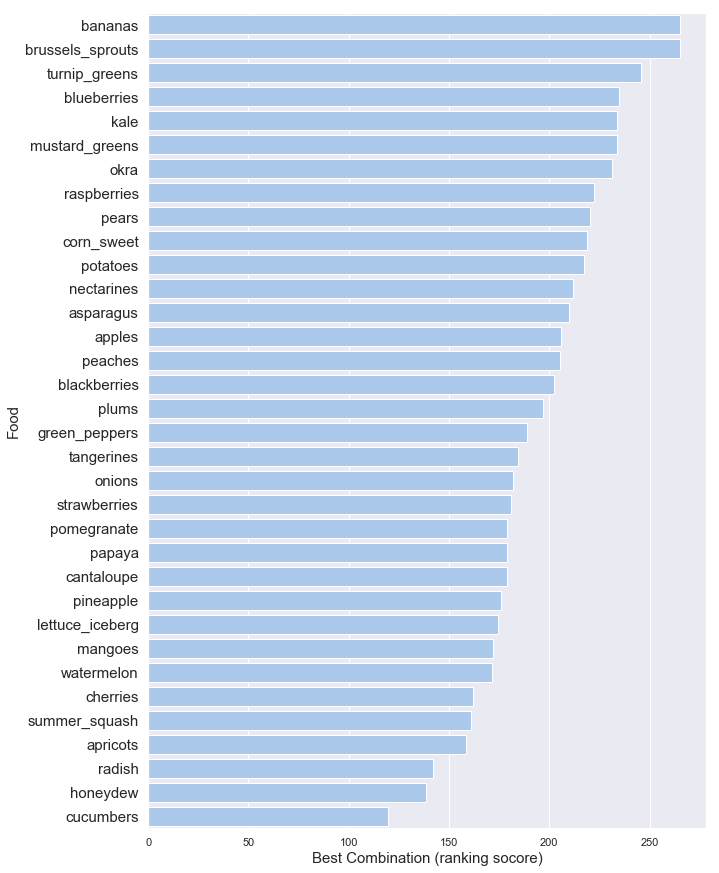

In [327]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plotting
sns.set_color_codes("pastel")
sns.barplot(x='Best_Combination', y='food', data= DF_Rank, color="b", ci=None)

plt.xlabel("Best Combination (ranking socore)", fontsize=15)
plt.ylabel("Food", fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### Step 6: Results

In addition to the best value (price and yield) and energy (providing the energy source),I also consider the following nutrtients that play importnat role in metabolism.

1. Fe is the important element for Hemoglobin.

2. Fiber is associated with reduced diabetes risk.

3. Vitamin C Vitamin C is an essential nutrient involved in the repair of tissue and the enzymatic production of certain neurotransmitters.

4. Vitamin B6 servess as a coenzyme in some 100 enzyme reactions in amino acid, glucose, and lipid metabolism.

I rank the best value and each nutrition by food. Each food has a sum of ranking scores, determning the best combination of price, yield, and nutrition. 
The result shows that __banana__ and __brussel sprouts__ are the best food that provide best value, and the most amount of targeted nutrition.